<a href="https://colab.research.google.com/github/chotu259/Bhargavi/blob/main/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our objective is to build a neural network for the classification of the MNIST dataset. This neural network will comprise of: an output layer with 10 nodes, a hidden layer of 128 nodes, and an input layer with 784 nodes corresponding to the image pixels. The specific structure of the neural network is outlined below, where $X$ represents the input, $A^{[0]}$ denotes the first layer, $Z^{[1]}$ signifies the unactivated layer 1, $A^{[1]}$ stands for the activated layer 1, and so forth. The weights and biases are represented by $W$ and $b$ respectively:

<div align="center">

$A^{[0]}=X$

$Z^{[1]}=W^{[1]}A^{[0]}+b^{[1]}$

$A^{[1]}=\text{ReLU}(Z^{[1]})$

$Z^{[2]}=W^{[2]}A^{[1]}+b^{[2]}$

$A^{[2]}=\text{softmax}(Z^{[2]})$

$Loss=\text{cross-entropy-loss}(A^{[2]})$
</div>

You have the flexibility to create any function within or outside the class, allowing you to modify parameters as needed

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


Now you will implement the activation function(ReLU) and softmax function

In [4]:
def derivative_relu(z):
    return np.where(z > 0, 1, 0)

def ReLU(z):
    return np.maximum(0, z)

def softmax(x):
    expX = np.exp(x - np.max(x, axis=0, keepdims=True))  # for numerical stability
    return expX / np.sum(expX, axis=0, keepdims=True)


Now comes the important part.

In this, you will implement the NN class, which will be the model you will be using to train data on and later use it to predict.

You have been given the init function, you have to implement all the other functions yourself, in any way you like ... you may even skip some of them if you don't need them in the final implementation of the class.

The description of each function has been given in the comments

In [5]:
class NN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # initialized basic stats of NN
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # initialized weights and biases
        self.W1 = np.random.randn(hidden_size, input_size) * 0.001
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.001
        self.b2 = np.zeros((output_size, 1))

        # initialized activations and gradients
        self.A0 = None
        self.Z1 = None
        self.A1 = None
        self.Z2 = None
        self.A2 = None
        self.dW2 = None
        self.db2 = None
        self.dW1 = None
        self.db1 = None

    def forward_propagation(self, X):
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = ReLU(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = softmax(self.Z2)

    def one_hot(self, y):
        one_hot_encoded = np.zeros((y.shape[0], self.output_size))
        for i, val in enumerate(y):
            one_hot_encoded[i, val] = 1
        return one_hot_encoded.T

    def backward_propagation(self, X, y):
        dz2 = self.A2 - y
        self.m = y.shape[1]
        self.dW2 = (1 / self.m) * np.dot(dz2, self.A1.T)
        self.db2 = (1 / self.m) * np.sum(dz2, axis=1, keepdims=True)
        dz1 = np.dot(self.W2.T, dz2) * derivative_relu(self.Z1)
        self.dW1 = (1 / self.m) * np.dot(dz1, X.T)
        self.db1 = (1 / self.m) * np.sum(dz1, axis=1, keepdims=True)

    def update_params(self):
        self.W1 -= self.learning_rate * self.dW1
        self.b1 -= self.learning_rate * self.db1
        self.W2 -= self.learning_rate * self.dW2
        self.b2 -= self.learning_rate * self.db2

    def get_predictions(self, X):
        self.forward_propagation(X)
        return np.argmax(self.A2, axis=0)

    def get_accuracy(self, X, y):
        predictions = self.get_predictions(X)
        accuracy = np.mean(predictions == y)
        return accuracy

    def gradient_descent(self, X, y, iters=1000):
        y = self.one_hot(y)
        for i in range(iters):
            self.forward_propagation(X)
            self.backward_propagation(X, y)
            self.update_params()
            if i % 100 == 0:
                loss = self.cross_entropy_loss(y)
                print(f"Iteration {i}, Loss: {loss:.4f}")

    def cross_entropy_loss(self, y):
        return -(1 / self.m) * np.sum(y * np.log(self.A2 + 1e-8))

    def show_predictions(self, X, y, num_samples=10):
        random_indices = np.random.randint(0, X.shape[1], size=num_samples)
        for index in random_indices:
            sample_image = X[:, index].reshape((28, 28))
            plt.imshow(sample_image, cmap='gray')
            plt.title(f"Actual: {y[index]}, Predicted: {self.get_predictions(X)[index]}")
            plt.show()

Now we are splitting the dataset into training and testing data

In [6]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Normalize the data
miu = np.mean(X_train, axis=(0, 1), keepdims=True)
stds = np.std(X_train, axis=(0, 1), keepdims=True)
mius = np.mean(X_test, axis=(0, 1), keepdims=True)
stdse = np.std(X_test, axis=(0, 1), keepdims=True)
X_normal_train = (X_train - miu) / (stds + 1e-7)
X_normal_test = (X_test - mius) / (stdse + 1e-7)
X_normal_train = X_normal_train.reshape((60000, -1))
X_normal_test = X_normal_test.reshape((10000, -1))


11490434/11490434 [==============================] - 0s 0us/step


Now you will train the model on X_normal_train and Y_train dataset

Then print the accuracy of model on X_normal_test and Y_test dataset

Iteration 0, Loss: 2.3026
Iteration 100, Loss: 2.3003
Iteration 200, Loss: 2.2728
Iteration 300, Loss: 2.1138
Iteration 400, Loss: 1.7514
Iteration 500, Loss: 1.2014
Iteration 600, Loss: 0.8728
Iteration 700, Loss: 0.6955
Iteration 800, Loss: 0.5896
Iteration 900, Loss: 0.5204
Training Accuracy: 87.39%
Test Accuracy: 87.52%


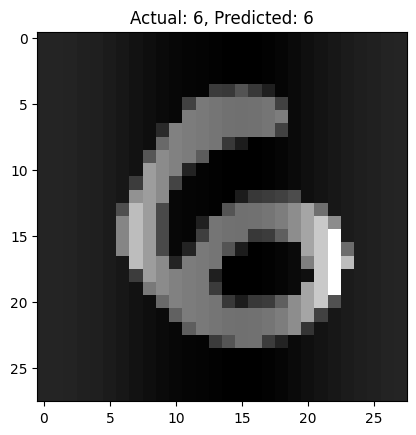

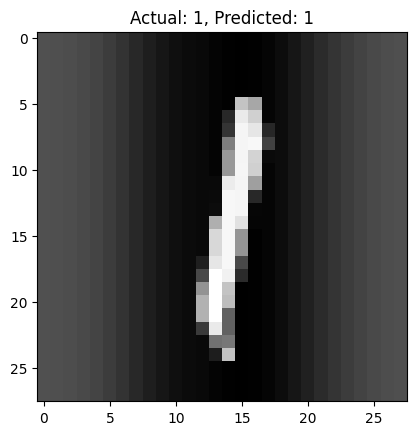

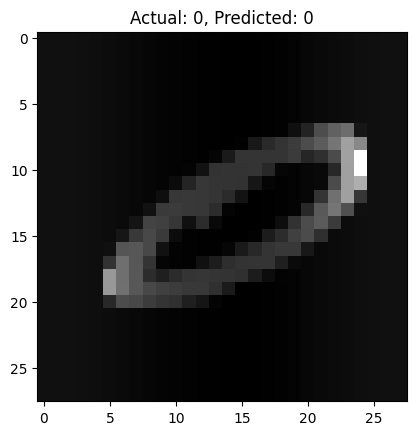

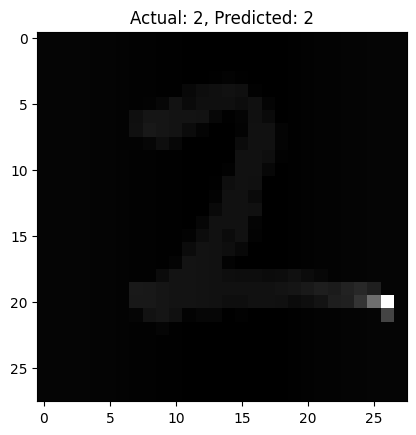

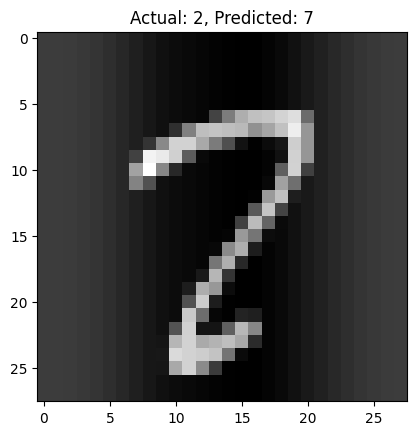

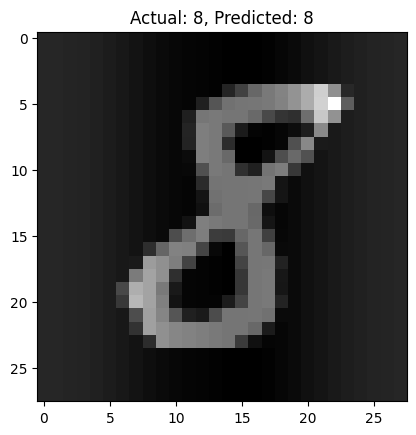

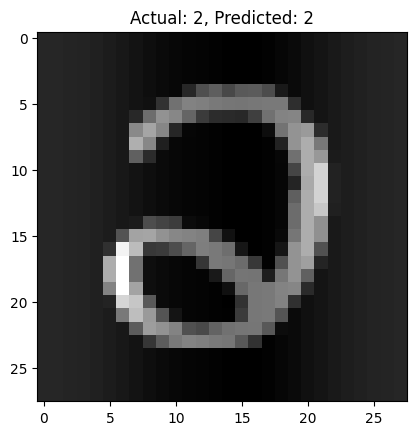

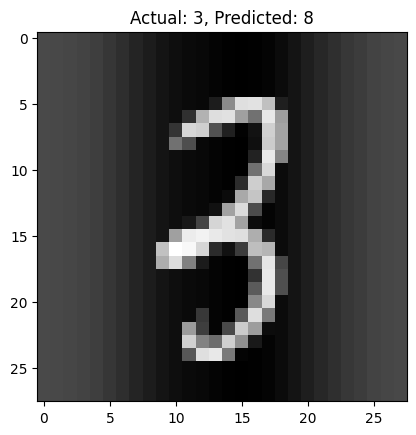

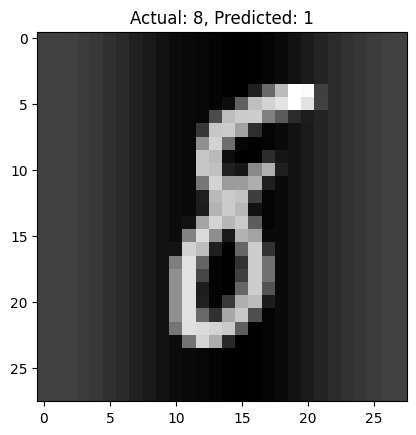

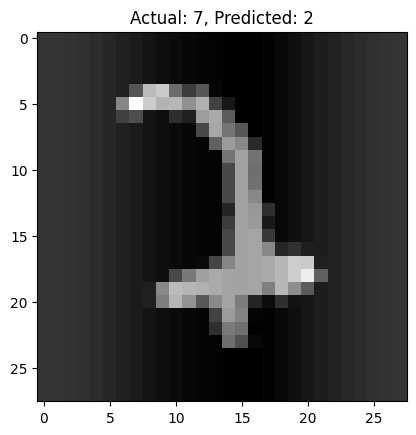

In [7]:
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.01
iterations = 1000

# Instantiate neural network
model = NN(input_size, hidden_size, output_size, learning_rate)

# Train the neural network
model.gradient_descent(X_normal_train.T, Y_train, iterations)

# Evaluate the accuracy of the model on training data
train_accuracy = model.get_accuracy(X_normal_train.T, Y_train)
print(f"Training Accuracy: {train_accuracy:.2%}")

# Evaluate the accuracy of the model on test data
test_accuracy = model.get_accuracy(X_normal_test.T, Y_test)
print(f"Test Accuracy: {test_accuracy:.2%}")

# Show predictions for a few samples
model.show_predictions(X_normal_test.T, Y_test, num_samples=10)